In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
%autosave 0 

Autosave disabled


In [4]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=[['Path_vit']]
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))



In [5]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [6]:
data=pd.read_csv('lecturasconodometria_nice runs.txt')
#data=data.iloc[:10000,:]

cols=['x','y','theta']
n_reads=data.shape[1]-3
n_reads
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)


data.columns=etiquetas
"""
data2=pd.read_csv('lecturasconodometria.txt')
data2.columns=etiquetas


data3= pd.concat((data,data2))

data=data3



####
index = data[data.y<-1].index
data=data.drop(index)
data.describe()



#####
"""

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]


xyth_foraf= xyth.sample(n=1000,random_state=42)


In [12]:
xyth.describe()

,x,y,theta
count,9585.000000,9585.000000,9585.000000
mean,-0.068431,3.047483,-0.239895
std,2.451440,1.853267,1.867660
min,-3.890653,-0.486738,-3.141423
25%,-2.392870,1.226904,-1.785290
50%,-0.040657,3.647964,0.000795
75%,2.182619,4.657280,1.376106
max,3.964976,5.604677,3.141554


In [7]:
from sklearn.cluster import AffinityPropagation

aff_prop= AffinityPropagation
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

In [8]:
af = AffinityPropagation(preference=-50).fit(xyth)

In [15]:
ccxyth=af.cluster_centers_
est= af.labels_
data['Y']=est    

new obs/ est almacenados


count    9585.000000
mean       46.738758
std        27.817165
min         0.000000
25%        23.000000
50%        46.000000
75%        68.000000
max        99.000000
Name: Y, dtype: float64

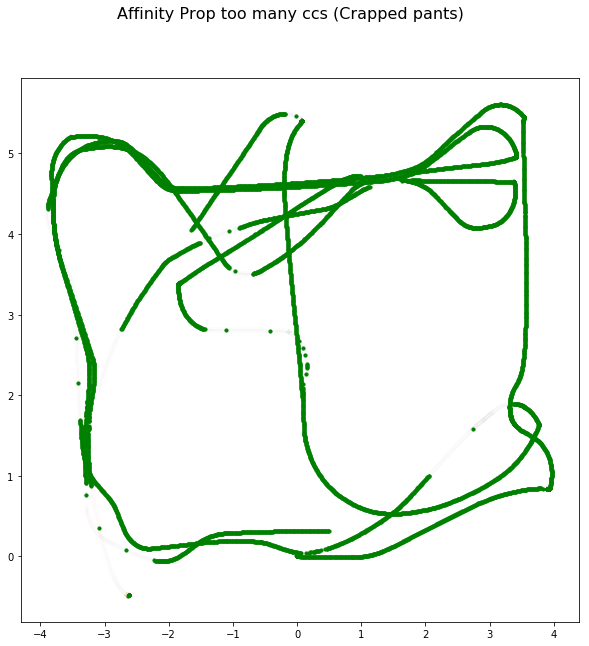

In [20]:
cc=ccxyth
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)
fig.suptitle('Affinity Prop too many ccs (Crapped pants)', fontsize=16)




cords3=path_to_xy(np.arange(0,len(cc)),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [19]:
len(cc)

8015

In [21]:
from sklearn.cluster import  MiniBatchKMeans

In [23]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=100, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)

In [25]:
mbk.fit(xyth)

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=100, n_init=10, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [28]:
ccxyth=mbk.cluster_centers_
est= mbk.labels_
data['Y_mbk']=est    

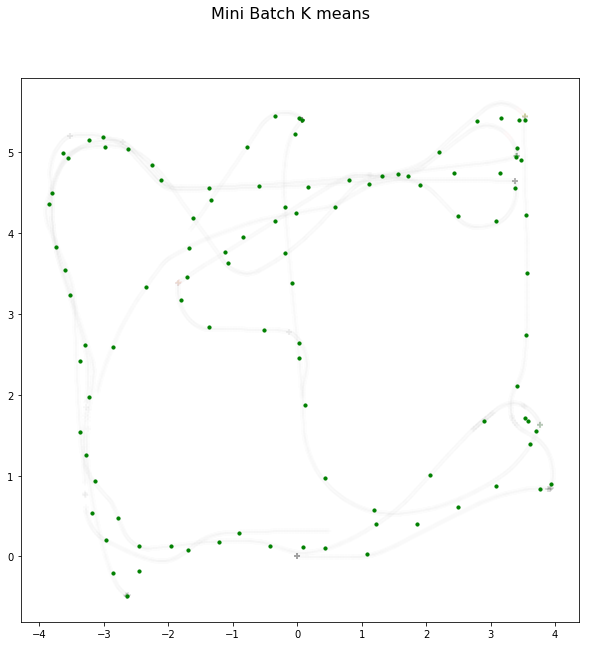

In [27]:
cc=ccxyth
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)
fig.suptitle('Mini Batch K means', fontsize=16)




cords3=path_to_xy(np.arange(0,len(cc)),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [35]:



N=100
kmedias2=KMeans(n_clusters=N)
kmedias2.fit(xyth)
est=kmedias2.labels_
ccxyth= kmedias2.cluster_centers_


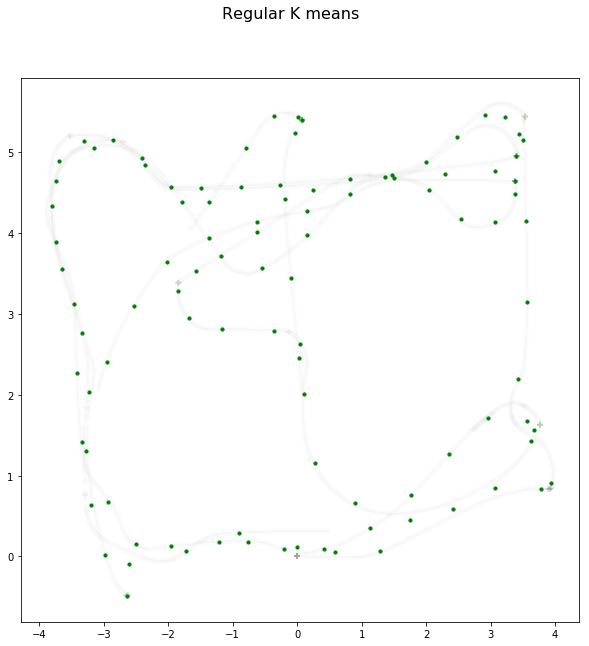

In [36]:
cc=ccxyth
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)
fig.suptitle('Regular K means', fontsize=16)




cords3=path_to_xy(np.arange(0,len(cc)),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [42]:
from sklearn.cluster import AgglomerativeClustering
agg_ward=AgglomerativeClustering(linkage='ward' , n_clusters=100)
agg_avg=AgglomerativeClustering(linkage='average' , n_clusters=100)
agg_complete=AgglomerativeClustering(linkage='complete' , n_clusters=100)
agg_single=AgglomerativeClustering(linkage='single' , n_clusters=100)

In [43]:

agg_ward.fit(xyth)
agg_avg.fit(xyth)
agg_complete.fit(xyth)
agg_single.fit(xyth)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=100,
                        pooling_func='deprecated')

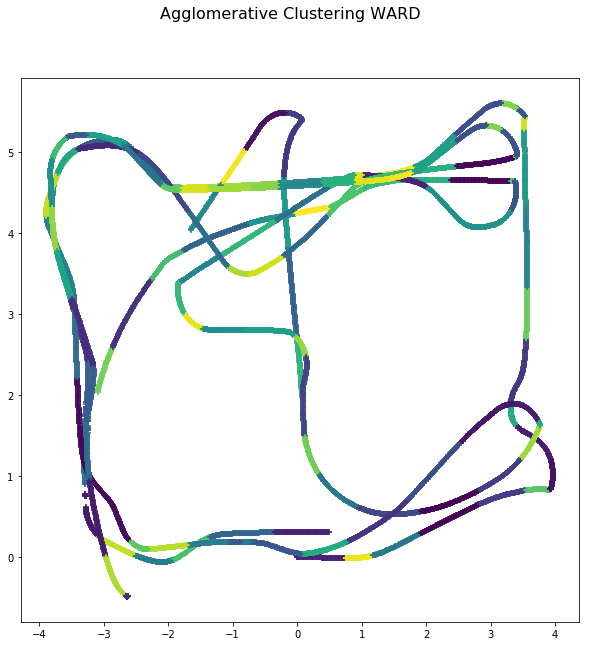

In [49]:
data.Y=agg_ward.labels_

fig = plt.figure(figsize=(10,10))
fig.suptitle('Agglomerative Clustering WARD', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y)


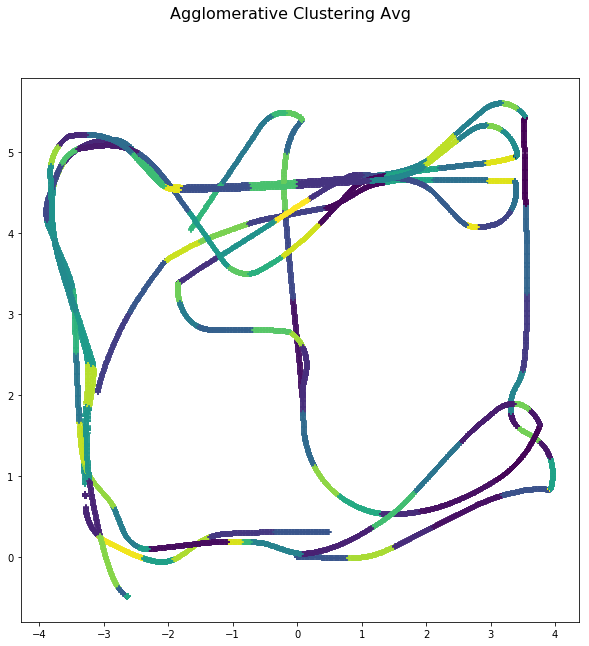

In [52]:
data.Y=agg_avg.labels_

fig = plt.figure(figsize=(10,10))
fig.suptitle('Agglomerative Clustering Avg', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y)


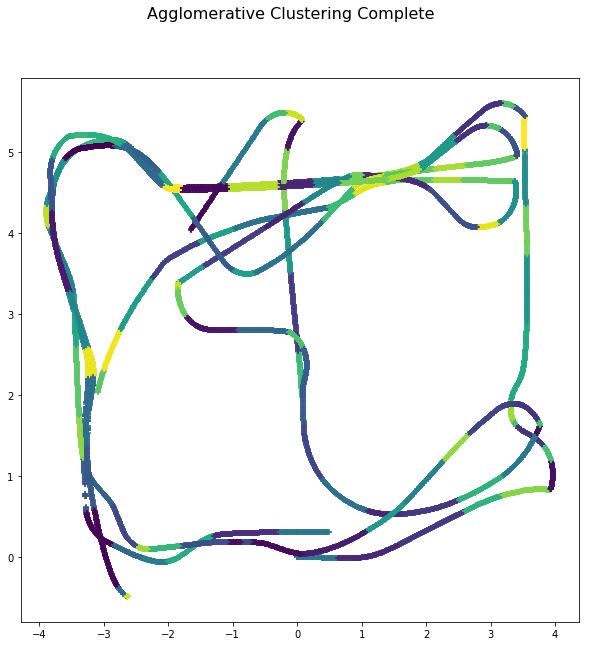

In [53]:
data.Y=agg_complete.labels_

fig = plt.figure(figsize=(10,10))
fig.suptitle('Agglomerative Clustering Complete', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y)


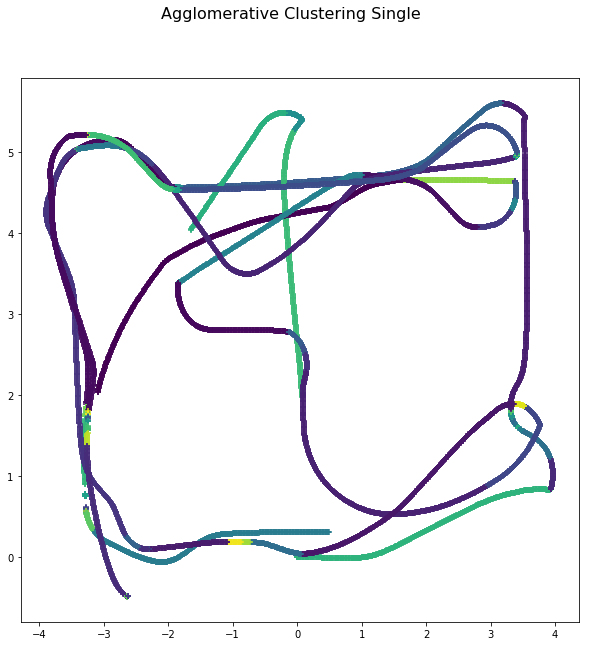

In [54]:
data.Y=agg_single.labels_

fig = plt.figure(figsize=(10,10))
fig.suptitle('Agglomerative Clustering Single', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y)


In [55]:
from sklearn.cluster import Birch

In [58]:
brc = Birch(branching_factor=50, n_clusters=100, threshold=0.1,
... compute_labels=True)

In [59]:
brc.fit(xyth)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=100,
      threshold=0.1)

In [60]:
data.Y=brc.labels_


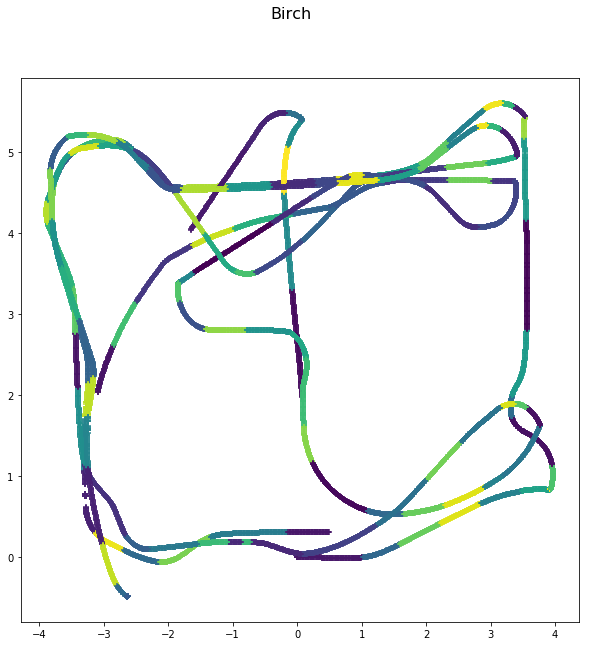

In [61]:

fig = plt.figure(figsize=(10,10))
fig.suptitle('Birch', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y)


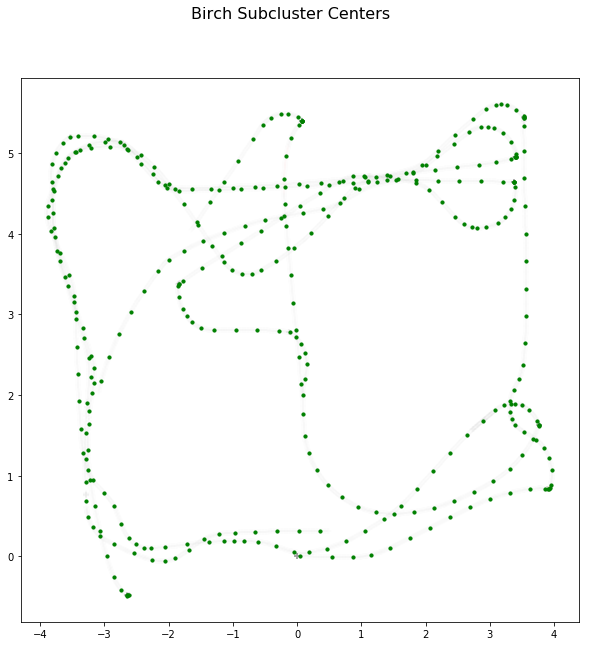

In [63]:
cc=brc.subcluster_centers_
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)
fig.suptitle('Birch Subcluster Centers', fontsize=16)




cords3=path_to_xy(np.arange(0,len(cc)),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')

